<a href="https://colab.research.google.com/github/Proj-Caliber/Job-Care/blob/Choiyonje/%EC%9E%A1%EC%BC%80%EC%96%B4_%EC%B5%9C%EC%A2%85_%EC%A0%95%EB%A6%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dacon의 잡케어 추천

- 시각화 한 것 제외, Feature에 변화를 준 것들만 모아봄.

## 1차 EDA Start


# 파일 불러오기 

In [182]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import sklearn as sk
warnings.filterwarnings("ignore")


#original given files
train= pd.read_csv('/content/drive/MyDrive/잡케어/train (5).csv')
test= pd.read_csv('/content/drive/MyDrive/잡케어/test (2).csv')

d_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_D_코드.csv', index_col=0).T.to_dict()
h_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_H_코드.csv', index_col=0).T.to_dict()
l_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_L_코드.csv', index_col=0).T.to_dict()

sub= pd.read_csv('/content/drive/MyDrive/잡케어/sample_submission.csv')

In [183]:
og_train=pd.read_csv('/content/drive/MyDrive/잡케어/train (5).csv')
og_test= pd.read_csv('/content/drive/MyDrive/잡케어/test (2).csv')

In [184]:
import os
import sys
import platform

print(f"- os: {platform.platform()}")

- os: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic


In [185]:
# 버전확인
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('sklearn : %s'%(sk.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
print('seaborn : %s'%(sns.__version__))
!python --version

Pandas : 1.1.5
Numpy : 1.19.5
sklearn : 1.0.2
matplotlib : 3.2.2
seaborn : 0.11.2
Python 3.7.12


# adding D,H,L codes to train, test

In [186]:
# 출처 
#https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent 코드 사용

def add_code(df, d_code, h_code, l_code):

  #n : 세분류, s: 소분류, m: 중분류, l: 대분류
  df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  # H Code
  df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

  df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 

  return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

# Missing Val Check

In [187]:
train.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
person_prefer_d_1_n 

In [188]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
person_prefer_d_1_n       0
person_prefer_d_1_s 

> Train, Test 모두 결측치 x

# Duplicated 확인


In [189]:
train.duplicated().unique()

array([False])

In [190]:
test.duplicated().unique()

array([False])

> No Duplicated rows

# DataType 확인 후 적절히 변환해주기

In [191]:
train= train.copy()
test= test.copy()

print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())

train dtypes: int64     52
bool       6
object     1
dtype: int64
-------------
test dtypes: int64     51
bool       6
object     1
dtype: int64


> int 제외 bool & object type 존재함. 적절히 변환 해 주기

# 1. Boolean Type 
> Match Columns 6개 ( True, False) > int로 변경 해 주기

- True > 1, False > 0

In [192]:
def booltoint(df):
  df['d_l_match_yn']=df.d_l_match_yn.astype(int)
  df['d_m_match_yn']=df.d_m_match_yn.astype(int)
  df['d_s_match_yn']=df.d_s_match_yn.astype(int)
  df['h_l_match_yn']=df.h_l_match_yn.astype(int)
  df['h_m_match_yn']=df.h_m_match_yn.astype(int)
  df['h_s_match_yn']=df.h_s_match_yn.astype(int)

  
booltoint(train)
booltoint(test)

In [193]:
print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())

train dtypes: int64     58
object     1
dtype: int64
-------------
test dtypes: int64     57
object     1
dtype: int64


In [194]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m
0,0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422
1,1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417
2,2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363
3,3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381
4,4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381


Model에 넣고 적용할 수 있게 Boolean Type을 Int Type으로 변경.

# 2. Object Type 변경

> train, test의 contents_open_dt 는 object type의 변수이기에, 적절히 변환 해 주기.

In [195]:
def objtoint(df):
  # pd.to_datetime 이용해서 변경
  df['contents_open_dt']= pd.to_datetime(df.contents_open_dt, format='%Y-%m-%d %H:%M:%S' )
  df['contents_open_dt_year']= df['contents_open_dt'].dt.year.astype(int)
  df['contents_open_dt_month']=df['contents_open_dt'].dt.month.astype(int)
  df['contents_open_dt_day']=df['contents_open_dt'].dt.day.astype(int)
  df['contents_open_dt_hour']=df['contents_open_dt'].dt.hour.astype(int)
  df['contents_open_dt_minute']=df['contents_open_dt'].dt.minute.astype(int)
  df['contents_open_dt_sec']= df['contents_open_dt'].dt.second.astype(int)

In [196]:
#working hours 변수 생성

# def working_hours(df):
#   df['working_hours']= df['contents_open_dt_hour'].copy()
#   df['working_hours']=df['working_hours'].apply(lambda x: 1 if (x>8 and x<19) else 0 )

# train_copy['season']= train_copy['contents_open_dt_month'].copy()
# train_copy['season']= train_copy['season'].apply(lambda x: 1 if (x>=12 or x<=2) else (2 if x>=3 and x<=5 else( 3 if x>=6 and x<=8 else 4)))

# working_hours(train_df)
# working_hours(test_df)

# train_df.drop('working_hours',axis=1,inplace=True)
# test_df.drop('working_hours',axis=1, inplace=True)

# 모델 점수 더 내려감. 

In [197]:
objtoint(train)
objtoint(test)

In [198]:
def get_weekdays(df):
  df['weekday']= df['contents_open_dt'].apply(lambda x: x.weekday())
  df['weekend']= df['weekday'].copy()
  df['weekend']= df['weekend'].apply(lambda x:1 if x>4 else 0)

In [199]:
get_weekdays(train)
get_weekdays(test)

In [200]:
#dropping contents_open_dt
train.drop('contents_open_dt',axis=1, inplace=True)
test.drop('contents_open_dt',axis=1, inplace=True)

In [201]:
#변환을 모두 한 뒤 print
print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())

train dtypes: int64    66
dtype: int64
-------------
test dtypes: int64    65
dtype: int64


> 모델에 적용시키기 위해 dtype을 적절히 변환 시켜주었다. 

Boolean / Object > int type

# Dropping unnecessary columns

In [202]:
train_nu= pd.DataFrame(train.nunique())
test_nu=pd.DataFrame(test.nunique())

In [203]:
print(train_nu[train_nu[0]<2])
print('--------------------------')
print(test_nu[test_nu[0]<2])

                       0
person_prefer_f        1
person_prefer_g        1
contents_open_dt_year  1
--------------------------
                        0
person_prefer_f         1
person_prefer_g         1
contents_open_dt_year   1
contents_open_dt_month  1


> Train, Test 공통적으로 Single Value를 가진 Column이 존재한다. 

1. person_prefer_f
2. person_prefer_g
3. contents_open_dt_year

위 Col들은 분석 할 때 필요 없다고 판단하여 Drop을 진행하겠다. 

In [204]:
def droppings(df):
  df.drop('person_prefer_f',axis=1,inplace=True)
  df.drop('person_prefer_g',axis=1, inplace=True)
  df.drop('contents_open_dt_year',axis=1,inplace=True)

droppings(train)
droppings(test)

- 추가적으로 id또한 필요없는 변수라 생각하여 drop 진행. 

In [205]:
train.drop('id',axis=1, inplace=True)
test.drop('id',axis=1, inplace=True)

In [206]:
print(train.shape)
print(test.shape)

(501951, 62)
(46404, 61)


In [207]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec,weekday,weekend
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36,4,0
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52,3,0
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10,2,0
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34,0,0
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22,0,0


In [208]:
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec,weekday,weekend
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,12,1,2,24,18,1,0
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,12,17,5,42,53,3,0
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,12,10,23,33,41,3,0
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,12,3,19,44,55,3,0
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,12,11,21,24,34,4,0


In [209]:
train.to_csv('/content/drive/MyDrive/잡케어/train_checkings.csv',index=False)
test.to_csv('/content/drive/MyDrive/잡케어/test_checkings.csv',index=False)

# train test Split

In [210]:
from sklearn import metrics
from sklearn.metrics import f1_score, auc, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

x= train.drop('target',axis=1)
y= train['target']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

# 1차 EDA 마친 후의 Classification Scores

0.6241

In [211]:
!pip install catboost

In [212]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [213]:
cbc= CatBoostClassifier(random_state=0)
xgb= XGBClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)
forest= RandomForestClassifier(random_state=0)
ada= AdaBoostClassifier(random_state=0)
etc= ExtraTreesClassifier(random_state=0)

model_list= [cbc, xgb, lgbm, forest, ada, etc]

In [214]:
for model in model_list:
  model.fit(x_train,y_train)
  y_pred= model.predict(x_test)
  print(model, ":", f1_score(y_test, y_pred),'\n', confusion_matrix(y_pred, y_test))

Learning rate set to 0.133271
0:	learn: 0.6878175	total: 181ms	remaining: 3m
1:	learn: 0.6837472	total: 377ms	remaining: 3m 8s
2:	learn: 0.6806148	total: 528ms	remaining: 2m 55s
3:	learn: 0.6780371	total: 717ms	remaining: 2m 58s
4:	learn: 0.6758645	total: 872ms	remaining: 2m 53s
5:	learn: 0.6742665	total: 999ms	remaining: 2m 45s
6:	learn: 0.6728729	total: 1.2s	remaining: 2m 49s
7:	learn: 0.6717718	total: 1.33s	remaining: 2m 44s
8:	learn: 0.6707262	total: 1.47s	remaining: 2m 42s
9:	learn: 0.6697643	total: 1.62s	remaining: 2m 40s
10:	learn: 0.6689495	total: 1.74s	remaining: 2m 36s
11:	learn: 0.6682464	total: 1.87s	remaining: 2m 34s
12:	learn: 0.6675431	total: 2.01s	remaining: 2m 32s
13:	learn: 0.6669057	total: 2.16s	remaining: 2m 32s
14:	learn: 0.6663471	total: 2.33s	remaining: 2m 32s
15:	learn: 0.6658768	total: 2.46s	remaining: 2m 31s
16:	learn: 0.6654871	total: 2.61s	remaining: 2m 30s
17:	learn: 0.6650615	total: 2.75s	remaining: 2m 30s
18:	learn: 0.6646311	total: 2.89s	remaining: 2m 29

> 기본적인 작업 마친 후의 train, val 점수
- 1) CatBoostClassifier : 0.6392
- 2) LGBMClassifier : 0.6321
- 3) RandomForestClassifier : 0.6246
- 4) ExtraTreesClassifier : 0.6157
- 5) XGBClassifier : 0.6126
- 6) AdaBoostClassifier : 0.6037

1    23694
0    22710
Name: target, dtype: int64


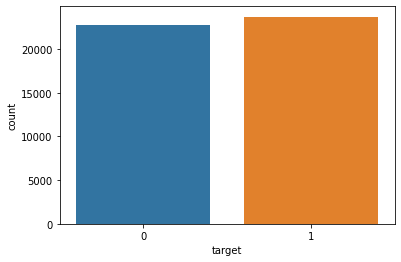

In [215]:
y_pred_final= cbc.predict(test)
sub['target']=y_pred_final

print(sub.target.value_counts())
sns.countplot(sub.target)

In [216]:
sub.to_csv('/content/drive/MyDrive/잡케어/sample_sub_0120_1.csv', index=False)

# 2차 EDA Start


0.6267

> mean target encoder로 했는데, smoothing 적용도 고려해보면 좋을 듯

In [217]:
train_nu= pd.DataFrame(train.nunique())
test_nu=pd.DataFrame(test.nunique())

In [218]:
train_nu

,0
d_l_match_yn,2
d_m_match_yn,2
d_s_match_yn,2
h_l_match_yn,2
h_m_match_yn,2
...,...
contents_open_dt_hour,24
contents_open_dt_minute,60
contents_open_dt_sec,60
weekday,7


> Mean Target Encoding

col에 너무 많은 피쳐들이 들어가있을 경우, 전체를 dummy화 시키면 High Cardinality 문제가 생김. 따라서 Mean Target Encoding 시도

시도 할 col들 : 하위속성 제외하고 feature가 100개 이상인 col들 

> person_prefer_d_1, person_prefer_d_2, person_prefer_d_3,
person_prefer_h_1, person_prefer_h_2, person_prefer_h_3 ,contents_attribute_l, contents_attribute_d, contents_attribute_h

적용 해 보고 see if there is any change to the f1_score

##1. Mean Target Encoding

참고: https://casa-de-feel.tistory.com/22

In [219]:
train_df= train.copy()
test_df= test.copy()

In [220]:
print(train.shape)
print(test.shape)

(501951, 62)
(46404, 61)


In [221]:
#straight to train, test
#d_1
pp_d_1_mean= train_df.groupby('person_prefer_d_1')['target'].mean()
pp_d_2_mean= train_df.groupby('person_prefer_d_2')['target'].mean()
pp_d_3_mean= train_df.groupby('person_prefer_d_3')['target'].mean()

pp_h_1_mean= train_df.groupby('person_prefer_h_1')['target'].mean()
pp_h_2_mean= train_df.groupby('person_prefer_h_2')['target'].mean()
pp_h_3_mean= train_df.groupby('person_prefer_h_3')['target'].mean()

ca_l_mean= train_df.groupby('contents_attribute_l')['target'].mean()
ca_d_mean= train_df.groupby('contents_attribute_d')['target'].mean()
ca_h_mean= train_df.groupby('contents_attribute_h')['target'].mean()

In [222]:
def mappings(df):
  df['person_prefer_d_1_encoded']= df['person_prefer_d_1'].map(pp_d_1_mean)
  df['person_prefer_d_2_encoded']= df['person_prefer_d_2'].map(pp_d_2_mean)
  df['person_prefer_d_3_encoded']= df['person_prefer_d_3'].map(pp_d_3_mean)

  df['person_prefer_h_1_encoded']= df['person_prefer_h_1'].map(pp_h_1_mean)
  df['person_prefer_h_2_encoded']= df['person_prefer_h_2'].map(pp_h_2_mean)
  df['person_prefer_h_3_encoded']= df['person_prefer_h_3'].map(pp_h_3_mean)

  df['contents_attribute_l_encoded'] = df['contents_attribute_l'].map(ca_l_mean)
  df['contents_attribute_d_encoded'] = df['contents_attribute_d'].map(ca_d_mean)
  df['contents_attribute_h_encoded']= df['contents_attribute_h'].map(ca_h_mean)
mappings(train_df)
mappings(test_df)

In [223]:
#train, test에 다 적용
print(train_df.shape)
print(test_df.shape)

(501951, 71)
(46404, 70)


In [224]:
x= train_df.drop('target',axis=1)
y= train_df['target']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [225]:
cbc= CatBoostClassifier(random_state=0)
xgb= XGBClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)
forest= RandomForestClassifier(random_state=0)
ada= AdaBoostClassifier(random_state=0)
etc= ExtraTreesClassifier(random_state=0)

model_list= [cbc, xgb, lgbm, forest, ada, etc]

In [226]:
for model in model_list:
  model.fit(x_train,y_train)
  y_pred= model.predict(x_test)
  print(model, ":", f1_score(y_test, y_pred),'\n', confusion_matrix(y_pred, y_test))

Learning rate set to 0.133271
0:	learn: 0.6860182	total: 157ms	remaining: 2m 36s
1:	learn: 0.6805103	total: 312ms	remaining: 2m 35s
2:	learn: 0.6764356	total: 467ms	remaining: 2m 35s
3:	learn: 0.6729965	total: 636ms	remaining: 2m 38s
4:	learn: 0.6703088	total: 776ms	remaining: 2m 34s
5:	learn: 0.6681663	total: 946ms	remaining: 2m 36s
6:	learn: 0.6661746	total: 1.09s	remaining: 2m 34s
7:	learn: 0.6645967	total: 1.23s	remaining: 2m 32s
8:	learn: 0.6632509	total: 1.39s	remaining: 2m 33s
9:	learn: 0.6620654	total: 1.55s	remaining: 2m 33s
10:	learn: 0.6610605	total: 1.72s	remaining: 2m 34s
11:	learn: 0.6600913	total: 1.88s	remaining: 2m 34s
12:	learn: 0.6593071	total: 2.02s	remaining: 2m 33s
13:	learn: 0.6586108	total: 2.18s	remaining: 2m 33s
14:	learn: 0.6579197	total: 2.35s	remaining: 2m 34s
15:	learn: 0.6573539	total: 2.47s	remaining: 2m 32s
16:	learn: 0.6568622	total: 2.62s	remaining: 2m 31s
17:	learn: 0.6563612	total: 2.74s	remaining: 2m 29s
18:	learn: 0.6557856	total: 2.9s	remaining: 

1차 eda > id 외 single value인 col drop

- 1) CatBoostClassifier : 0.6392 
- 2) LGBMClassifier : 0.6321 
- 3) RandomForestClassifier : 0.6246 
- 4) ExtraTreesClassifier : 0.6157 
- 5) XGBClassifier : 0.6126 
- 6) AdaBoostClassifier : 0.6037 

d/h encoding > person_attribute_d(1,2,3), person_attribute_h(1,2,3)

- 1) CatBoostClassifier : 0.6433
- 2) LGBMClassifier : 0.6342
- 3) RandomForestClassifier :  0.6306
- 4) ExtraTreesClassifier :  0.6193
- 5) XGBClassifier : 0.6166
- 6) AdaBoostClassifier : 0.6051
약 0.4 올랐다. 

추가적으로 contents_attribute(l,d,h) mean encoding
- 1) CatBoostClassifier : 0.6506
- 2) LGBMClassifier : 0.6410
- 3) RandomForestClassifier :  0.6357
- 4) ExtraTreesClassifier :  0.6272
- 5) XGBClassifier : 0.6271
- 6) AdaBoostClassifier : 0.6138

datetime(weekday, weekend) 추가 후 또 오름
- 1) CatBoostClassifier : 0.6513

In [227]:
sub_2= pd.read_csv('/content/drive/MyDrive/잡케어/sample_submission.csv')

1    23707
0    22697
Name: target, dtype: int64


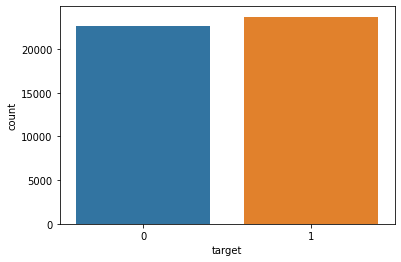

In [228]:
y_pred_final_2= cbc.predict(test_df)
sub_2['target']= y_pred_final_2

print(sub_2.target.value_counts())
sns.countplot(sub_2.target)

In [229]:
sub_2.to_csv('/content/drive/MyDrive/잡케어/sample_sub_0122.csv', index=False)
#실제 제출 점수_1 : 0.6241
#실제 제출 점수_2 : 0.6267

## smoothing train_3

> mean targeting은 overfitting이 일어날 수 있음으로, 치우친 평균을 전체 평균에 가깝도록 smoothing을 해 줌.



In [230]:
# applied_col= ['pp_d1_n_rows','pp_d2_n_rows','pp_d3_n_rows',
#               'pp_h1_n_rows','pp_h2_n_rows','pp_h3_n_rows',
#               'ca_l_n_rows','ca_d_n_rows','ca_h_n_rows']

# map_need_cols= ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3',
#                 'person_prefer_h_1','person_prefer_h_2','person_prefer_h_3',
#                 'contents_attribute_l','contents_attribute_d','contents_attribute_h']

# mean_targeted_cols= ['person_prefer_d_1_encoded','person_prefer_d_2_encoded','person_prefer_d_3_encoded',
#                      'person_prefer_h_1_encoded','person_prefer_h_2_encoded','person_prefer_h_3_encoded',
#                      'contents_attribute_l_encoded','contents_attribute_d_encoded','contents_attribute_h_encoded']

# global_mean= train['target'].mean()
# alpha=0.5

# #train n_rows
# def map_nrow(col1, col2):
#   train_3[col1]= train_3[col2].map(train_3.groupby(col2).size())

# #appling the n_rows
# for i,j in zip(applied_col, map_need_cols):
#   map_nrow(i,j)

# def smoothing(n_rows, target_mean):
#   return ((target_mean * n_rows) + (global_mean * alpha)/ (n_rows + alpha))


#possible outlier 시각화

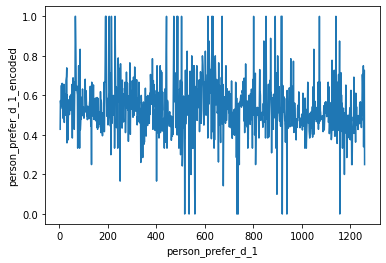

In [231]:
# import plotly.express as px
sns.lineplot(data=train_df, x= 'person_prefer_d_1',y='person_prefer_d_1_encoded')

# 완전 0, 완전 1 값이 존재?

In [232]:
ppddf= train_df[['person_prefer_d_1','person_prefer_d_1_encoded']].drop_duplicates()

In [233]:
ppddf[(ppddf.person_prefer_d_1_encoded==0)]

,person_prefer_d_1,person_prefer_d_1_encoded
29795,535,0.0
49528,938,0.0
66638,737,0.0
68847,919,0.0
73146,732,0.0
109076,559,0.0
215145,1156,0.0
363307,517,0.0


In [234]:
ppddf[ppddf.person_prefer_d_1_encoded==1]

,person_prefer_d_1,person_prefer_d_1_encoded
7664,472,1.0
10871,193,1.0
14683,442,1.0
16846,917,1.0
45434,67,1.0
74321,852,1.0
85418,66,1.0
106246,504,1.0
109306,230,1.0
112187,488,1.0


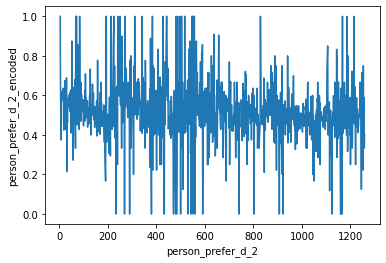

In [235]:
sns.lineplot(data=train_df, x= 'person_prefer_d_2',y='person_prefer_d_2_encoded')

완전 outlier이라고 볼 수는 없을 듯 해서 이 부분은 넘기는 걸로 결정

# 3차 EDA

> dummy변수 지정

In [236]:
train_df

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec,weekday,weekend,person_prefer_d_1_encoded,person_prefer_d_2_encoded,person_prefer_d_3_encoded,person_prefer_h_1_encoded,person_prefer_h_2_encoded,person_prefer_h_3_encoded,contents_attribute_l_encoded,contents_attribute_d_encoded,contents_attribute_h_encoded
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36,4,0,0.555977,0.501582,0.555916,0.572908,0.541915,0.558634,0.501231,0.417795,0.463074
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52,3,0,0.496500,0.492168,0.488634,0.515464,0.495718,0.496665,0.501231,0.417795,0.543445
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10,2,0,0.431395,0.487861,0.435365,0.463174,0.486959,0.469785,0.575518,0.484517,0.460276
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34,0,0,0.602927,0.583512,0.595647,0.462892,0.463286,0.482253,0.501231,0.417795,0.499603
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22,0,0,0.555977,0.501582,0.555916,0.442883,0.447858,0.451406,0.501231,0.417795,0.499603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,0,1,0,0,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,3,13,12,55,52,4,0,0.433417,0.458015,0.477188,0.512656,0.524103,0.507998,0.534375,0.554324,0.535479
501947,1,1,0,1,0,0,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,1,20,11,51,51,0,0,0.517694,0.537003,0.535041,0.501135,0.398983,0.507998,0.490502,0.593347,0.438095
501948,1,1,1,1,0,0,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,8,5,17,27,24,2,0,0.544506,0.516785,0.538146,0.512656,0.512324,0.496535,0.489028,0.554324,0.535479
501949,1,0,0,1,0,0,1,1,2,1,46,147,145,4,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456

In [237]:
uniq_tr=pd.DataFrame(train_df.nunique())
uniq_test=pd.DataFrame(test_df.nunique())

uniq_all=pd.concat([uniq_tr,uniq_test],axis=1)

In [238]:
uniq_all.drop('target',inplace=True)

In [239]:
uniq_all=uniq_all.astype(int)

In [240]:
uniq_all.head(10)

#person_attribute_a_1, person_attribute_b
#person_prefer_b, person_prefer_c

,0,0
d_l_match_yn,2,2
d_m_match_yn,2,2
d_s_match_yn,2,2
h_l_match_yn,2,2
h_m_match_yn,2,2
h_s_match_yn,2,2
person_attribute_a,2,2
person_attribute_a_1,8,8
person_attribute_b,6,6
person_prefer_c,5,5


In [241]:
uniq_all.tail(60)
#contents_attribute_i, contents_attribute_a, contents_attribute_j_1, 
#contents_attribute_m, contents_attribute_e, weekday

,0,0
person_prefer_d_1,1093,955
person_prefer_d_2,1081,863
person_prefer_d_3,1043,775
person_prefer_e,12,12
person_prefer_h_1,279,271
person_prefer_h_2,279,274
person_prefer_h_3,279,270
contents_attribute_i,3,3
contents_attribute_a,3,3
contents_attribute_j_1,9,9


> 더미화 진행을 하기 위해선 train, test의 col모두 동일한 갯수의 피쳐를 가져야 하며, 너무 많은 피쳐를 보유 할 시 too sparse 해지기 때문에

dummy 기준 > feature 10개 미만 & train,test 피쳐 값 동일

person_attribute_a_1, person_attribute_b,
person_prefer_c,
contents_attribute_i, contents_attribute_a, contents_attribute_j_1, contents_attribute_c, contents_attribute_m, contents_attribute_e, weekday

로 추렸지만, 순서형 데이터는 제외해야하기 때문에

person_prefer_c,contents_attribute_i,contents_attribute_i, contents_attribute_a, contents_attribute_j_1, contents_attribute_c, contents_attribute_m만 더미화 진행


person_prefer_c	5	5

contents_attribute_i	3	3

contents_attribute_a	3	3

contents_attribute_j_1	9	9

contents_attribute_c	4	4

contents_attribute_m	5	5

In [242]:
dum_df= ['person_prefer_c','contents_attribute_i',
         'contents_attribute_a','contents_attribute_j_1',
         'contents_attribute_c', 'contents_attribute_m']

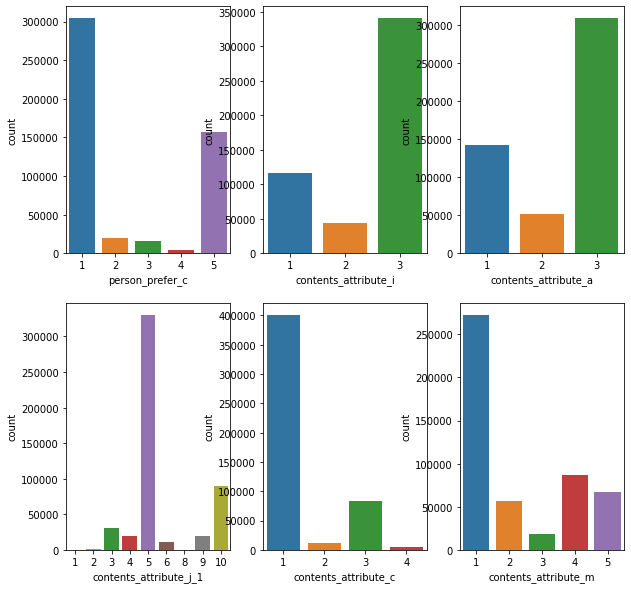

In [243]:
plt.figure(figsize=(10,10))
for i,j in zip(range(len(dum_df)),dum_df):
  plt.subplot(2,3,i+1)
  sns.countplot(train_df[j])

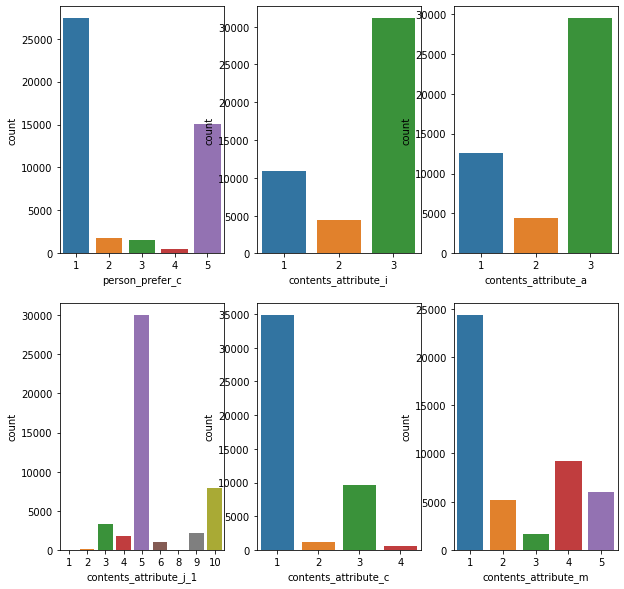

In [244]:
plt.figure(figsize=(10,10))
for i,j in zip(range(len(dum_df)),dum_df):
  plt.subplot(2,3,i+1)
  sns.countplot(test_df[j])

train, test의 동일한 col에 동일한 feature이 있는것을 확인함. > dummy화

In [245]:
# train_df=pd.get_dummies(train_df, columns=['person_prefer_c','contents_attribute_i','contents_attribute_a',
#                               'contents_attribute_j_1','contents_attribute_c','contents_attribute_m'], drop_first=True)


# test_df=pd.get_dummies(test_df, columns=['person_prefer_c','contents_attribute_i','contents_attribute_a',
#                               'contents_attribute_j_1','contents_attribute_c','contents_attribute_m'], drop_first=True)

    

In [246]:
print(train_df.shape)
print(test_df.shape)

(501951, 71)
(46404, 70)


In [247]:
# x= train_df.drop('target',axis=1)
# y= train_df['target']

# x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [248]:
# for model in model_list:
#   model.fit(x_train,y_train)
#   y_pred= model.predict(x_test)
#   print(model, ":", f1_score(y_test, y_pred),'\n', confusion_matrix(y_pred, y_test))

왜 또 dummy 하니까 내려가는겨..

<catboost.core.CatBoostClassifier object at 0x7fe85e87e350> : 0.6494773385870448 
 [[29785 16098]
 [20553 33955]]

XGBClassifier() : 0.6250866117484025 


LGBMClassifier(random_state=0) : 0.6414304736541755 
 

RandomForestClassifier(random_state=0) : 0.634280961002104 

AdaBoostClassifier(random_state=0) : 0.6126521300656986 
 

ExtraTreesClassifier(random_state=0) : 0.6259912286780648 


https://www.kaggle.com/shahules/an-overview-of-encoding-techniques

>various encoding techniques including cycle 어쩌구

it here says that you need to replace the encoded cols, whilst I just had both of them in my dataframe. What to do with that?


In [252]:
train_df_10=train_df.copy()
train_df_10.drop(['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l','contents_attribute_d','contents_attribute_h'],axis=1,inplace=True)
#	person_prefer_d_1_encoded	person_prefer_d_2_encoded	person_prefer_d_3_encoded	person_prefer_h_1_encoded	person_prefer_h_2_encoded	person_prefer_h_3_encoded	contents_attribute_l_encoded	contents_attribute_d_encoded	contents_attribute_h_encoded

In [254]:
test_df_10=test_df.copy()
test_df_10.drop(['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l','contents_attribute_d','contents_attribute_h'],axis=1,inplace=True)
#	person_prefer_d_1_encoded	person_prefer_d_2_encoded	person_prefer_d_3_encoded	person_prefer_h_1_encoded	person_prefer_h_2_encoded	person_prefer_h_3_encoded	contents_attribute_l_encoded	contents_attribute_d_encoded	contents_attribute_h_encoded

drop 했을 때는 0.6495337817181291

In [255]:
x= train_df_10.drop('target',axis=1)
y= train_df_10['target']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [256]:
cbc.fit(x_train,y_train)
y_pred= cbc.predict(x_test)
f1_score(y_pred,y_test)

Learning rate set to 0.133271
0:	learn: 0.6861696	total: 189ms	remaining: 3m 8s
1:	learn: 0.6808042	total: 319ms	remaining: 2m 39s
2:	learn: 0.6764038	total: 468ms	remaining: 2m 35s
3:	learn: 0.6731825	total: 604ms	remaining: 2m 30s
4:	learn: 0.6704547	total: 753ms	remaining: 2m 29s
5:	learn: 0.6684812	total: 906ms	remaining: 2m 30s
6:	learn: 0.6665189	total: 1.04s	remaining: 2m 28s
7:	learn: 0.6648429	total: 1.18s	remaining: 2m 26s
8:	learn: 0.6634457	total: 1.31s	remaining: 2m 24s
9:	learn: 0.6622253	total: 1.44s	remaining: 2m 22s
10:	learn: 0.6611991	total: 1.58s	remaining: 2m 22s
11:	learn: 0.6603024	total: 1.72s	remaining: 2m 21s
12:	learn: 0.6594859	total: 1.85s	remaining: 2m 20s
13:	learn: 0.6588236	total: 1.97s	remaining: 2m 18s
14:	learn: 0.6581811	total: 2.1s	remaining: 2m 17s
15:	learn: 0.6575784	total: 2.23s	remaining: 2m 16s
16:	learn: 0.6570540	total: 2.36s	remaining: 2m 16s
17:	learn: 0.6565387	total: 2.48s	remaining: 2m 15s
18:	learn: 0.6558683	total: 2.62s	remaining: 2

0.6495337817181291

In [257]:
#DUmmy
train_df_10=pd.get_dummies(train_df_10, columns=['person_prefer_c','contents_attribute_i','contents_attribute_a',
                              'contents_attribute_j_1','contents_attribute_c','contents_attribute_m'])


test_df_10=pd.get_dummies(test_df_10, columns=['person_prefer_c','contents_attribute_i','contents_attribute_a',
                              'contents_attribute_j_1','contents_attribute_c','contents_attribute_m'])
  

In [258]:
x= train_df_10.drop('target',axis=1)
y= train_df_10['target']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

cbc.fit(x_train,y_train)
y_pred= cbc.predict(x_test)
f1_score(y_pred,y_test)

Learning rate set to 0.133271
0:	learn: 0.6864024	total: 156ms	remaining: 2m 35s
1:	learn: 0.6809433	total: 298ms	remaining: 2m 28s
2:	learn: 0.6767023	total: 448ms	remaining: 2m 28s
3:	learn: 0.6733560	total: 582ms	remaining: 2m 24s
4:	learn: 0.6707018	total: 714ms	remaining: 2m 22s
5:	learn: 0.6684030	total: 843ms	remaining: 2m 19s
6:	learn: 0.6665248	total: 977ms	remaining: 2m 18s
7:	learn: 0.6649381	total: 1.1s	remaining: 2m 16s
8:	learn: 0.6635498	total: 1.26s	remaining: 2m 18s
9:	learn: 0.6623560	total: 1.4s	remaining: 2m 18s
10:	learn: 0.6612685	total: 1.56s	remaining: 2m 19s
11:	learn: 0.6603258	total: 1.69s	remaining: 2m 19s
12:	learn: 0.6595529	total: 1.83s	remaining: 2m 19s
13:	learn: 0.6588774	total: 1.97s	remaining: 2m 19s
14:	learn: 0.6578971	total: 2.11s	remaining: 2m 18s
15:	learn: 0.6573322	total: 2.24s	remaining: 2m 18s
16:	learn: 0.6566805	total: 2.37s	remaining: 2m 16s
17:	learn: 0.6561622	total: 2.49s	remaining: 2m 16s
18:	learn: 0.6556722	total: 2.62s	remaining: 2

0.6500831724058813

In [264]:
train_df_10

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_e,contents_attribute_j,contents_attribute_k,contents_attribute_e,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,...,weekday,weekend,person_prefer_d_1_encoded,person_prefer_d_2_encoded,person_prefer_d_3_encoded,person_prefer_h_1_encoded,person_prefer_h_2_encoded,person_prefer_h_3_encoded,contents_attribute_l_encoded,contents_attribute_d_encoded,contents_attribute_h_encoded,person_prefer_c_1,person_prefer_c_2,person_prefer_c_3,person_prefer_c_4,person_prefer_c_5,contents_attribute_i_1,contents_attribute_i_2,contents_attribute_i_3,contents_attribute_a_1,contents_attribute_a_2,contents_attribute_a_3,contents_attribute_j_1_1,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_1,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_1,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5
0,1,1,1,0,0,0,1,4,3,8,2,2,4,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,...,4,0,0.555977,0.501582,0.555916,0.572908,0.541915,0.558634,0.501231,0.417795,0.463074,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,1,3,4,4,1,2,4,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,...,3,0,0.496500,0.492168,0.488634,0.515464,0.495718,0.496665,0.501231,0.417795,0.543445,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,2,0,3,3,2,1,4,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,...,2,0,0.431395,0.487861,0.435365,0.463174,0.486959,0.469785,0.575518,0.484517,0.460276,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,2,0,2,3,1,2,3,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,...,0,0,0.602927,0.583512,0.595647,0.462892,0.463286,0.482253,0.501231,0.417795,0.499603,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0,1,3,4,4,2,2,4,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,...,0,0,0.555977,0.501582,0.555916,0.442883,0.447858,0.451406,0.501231,0.417795,0.499603,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,0,1,0,0,1,1,2,3,1,2,5,503156,285850,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,...,4,0,0.433417,0.458015,0.477188,0.512656,0.524103,0.507998,0.534375,0.554324,0.535479,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
501947,1,1,0,1,0,0,1,6,2,4,2,2,4,676255,456996,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,...,0,0,0.517694,0.537003,0.535041,0.501135,0.398983,0.507998,0.490502,0.593347,0.438095,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
501948,1,1,1,1,0,0,1,7,4,4,1,2,7,4845